In [4]:
import os
import pandas as pd
import re
import unidecode
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np

In [5]:
df_India=pd.read_csv('.\\Spotify dataframes\\df_india_utf.csv')

df_India.head()

,artist,artist popularity,name,popularity,valence,danceability,modes
0,Shae Gill,66,Pasoori,85,0.669,0.714,0
1,Shubh,68,NO LOVE,82,0.733,0.771,0
2,Sidhu Moose Wala,80,295,82,0.432,0.557,0
3,AP Dhillon,74,Excuses,82,0.494,0.837,0
4,Charlie Puth,83,Left and Right (Feat. Jung Kook of BTS),94,0.719,0.881,1


In [6]:
df_Mexico=pd.read_csv('.\\Spotify dataframes\\df_mexico_utf.csv' )
df_Mexico.head()

,artist,artist popularity,name,popularity,valence,danceability,modes
0,Martín Vizcarra,0,Mi Bebito Fiu Fiu,0,0.677,0.742,0
1,Lasso,68,Ojos Marrones,81,0.720,0.809,0
2,Kate Bush,82,Running Up That Hill (A Deal With God),97,0.197,0.629,0
3,Joji,86,Glimpse of Us,99,0.268,0.440,1
4,Fresto Music,44,Me Hace Daño Verte,61,0.935,0.721,1


In [7]:
df_Sweden=pd.read_csv('.\\Spotify dataframes\\df_sweden_utf.csv' )
df_Sweden.head()

,artist,artist popularity,name,popularity,valence,danceability,modes
0,Bolaget,60,Kan Inte Gå,73,0.661,0.722,0
1,Miss Li,62,X,74,0.946,0.854,0
2,Kate Bush,82,Running Up That Hill (A Deal With God),97,0.197,0.629,0
3,BELL,53,MISSFÖRSTÅTT,71,0.818,0.824,1
4,Harry Styles,93,As It Was,94,0.662,0.520,0


In [8]:
df_Usa=pd.read_csv('.\\Spotify dataframes\\df_usa_utf.csv' )
df_Usa.head()

,artist,artist popularity,name,popularity,valence,danceability,modes
0,Kate Bush,82,Running Up That Hill (A Deal With God),97,0.197,0.629,0
1,Joji,86,Glimpse of Us,99,0.268,0.440,1
2,Harry Styles,93,As It Was,94,0.662,0.520,0
3,Drake,95,Jimmy Cooks (feat. 21 Savage),92,0.366,0.529,1
4,Bad Bunny,100,Me Porto Bonito,100,0.425,0.911,0


In [9]:
len(df_India),len(df_Mexico),len(df_Sweden),len(df_Usa)

(50, 50, 50, 50)

In [12]:
DF=pd.DataFrame(columns=["Song_name","Cluster label","artist popularity","popularity","valence","danceability","modes","India","Mexico","Sweden","USA","mel","rms(mean)","rms(var)","sc(mean)","sc(var)","zcr(mean)","zcr(var)","duration","bpm"])
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm


In [14]:
for i in range(len(df_India)):
    DF.at[i, "Song_name"]=df_India.at[i,'name']
    DF.at[i, "artist popularity"]=df_India.at[i,'artist popularity']
    DF.at[i, "popularity"]=df_India.at[i,"popularity"]
    DF.at[i, "valence"]=df_India.at[i,"valence"]
    DF.at[i, "danceability"]=df_India.at[i,"danceability"]
    DF.at[i, "modes"]=df_India.at[i,"modes"]
    DF.at[i, "India"]=1
    DF.at[i, "Mexico"]=0
    DF.at[i, "Sweden"]=0
    DF.at[i, "USA"]=0

In [15]:
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,NaN,66,85,0.669,0.714,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO LOVE,NaN,68,82,0.733,0.771,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295,NaN,80,82,0.432,0.557,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Excuses,NaN,74,82,0.494,0.837,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,The Last Ride,NaN,80,81,0.638,0.792,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Pathala Pathala (From ""Vikram"")",NaN,81,78,0.936,0.826,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Vikram - Title Track,NaN,81,80,0.145,0.638,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Chaand Baaliyan,NaN,62,80,0.886,0.729,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Arabic Kuthu - Halamithi Habibo (From ""Beast"")",NaN,81,80,0.625,0.608,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
size=len(DF)
for i in range(len(DF),len(DF)+len(df_Mexico)-1):
    DF.at[i, "Song_name"]=df_Mexico.at[i-size,'name']
    DF.at[i, "artist popularity"]=df_Mexico.at[i-size+1,'artist popularity']
    DF.at[i, "popularity"]=df_Mexico.at[i-size+1,"popularity"]
    DF.at[i, "valence"]=df_Mexico.at[i-size+1,"valence"]
    DF.at[i, "danceability"]=df_Mexico.at[i-size+1,"danceability"]
    DF.at[i, "modes"]=df_Mexico.at[i-size+1,"modes"]
    DF.at[i, "India"]=0
    DF.at[i, "Mexico"]=1
    DF.at[i, "Sweden"]=0
    DF.at[i, "USA"]=0

In [17]:
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,NaN,66,85,0.669,0.714,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO LOVE,NaN,68,82,0.733,0.771,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295,NaN,80,82,0.432,0.557,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Excuses,NaN,74,82,0.494,0.837,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Serafín Zambada,NaN,78,67,0.962,0.692,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Ni Lo Intentes,NaN,65,82,0.213,0.4,0,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Atlantis,NaN,78,68,0.642,0.639,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Decide Tú,NaN,70,87,0.304,0.566,1,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
size=len(DF)
for i in range(len(DF),len(DF)+len(df_Sweden)-1):
    DF.at[i, "Song_name"]=df_Sweden.at[i-size+1,'name']
    DF.at[i, "artist popularity"]=df_Sweden.at[i-size+1,'artist popularity']
    DF.at[i, "popularity"]=df_Sweden.at[i-size+1,"popularity"]
    DF.at[i, "valence"]=df_Sweden.at[i-size+1,"valence"]
    DF.at[i, "danceability"]=df_Sweden.at[i-size+1,"danceability"]
    DF.at[i, "modes"]=df_Sweden.at[i-size+1,"modes"]
    DF.at[i, "India"]=0
    DF.at[i, "Mexico"]=0
    DF.at[i, "Sweden"]=1
    DF.at[i, "USA"]=0

In [19]:
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,NaN,66,85,0.669,0.714,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO LOVE,NaN,68,82,0.733,0.771,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295,NaN,80,82,0.432,0.557,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Excuses,NaN,74,82,0.494,0.837,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,Djurens vaggvisa,NaN,58,67,0.451,0.743,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,"Sol, vind och vatten",NaN,58,65,0.336,0.44,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,Umbrella,NaN,49,57,0.669,0.878,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,Blitzkrieg 2022 - Drammen,NaN,57,69,0.712,0.809,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
size=len(DF)
for i in range(len(DF),len(DF)+len(df_Usa)-1):
    DF.at[i, "Song_name"]=df_Usa.at[i-size+1,'name']
    DF.at[i, "artist popularity"]=df_Usa.at[i-size+1,'artist popularity']
    DF.at[i, "popularity"]=df_Usa.at[i-size+1,"popularity"]
    DF.at[i, "valence"]=df_Usa.at[i-size+1,"valence"]
    DF.at[i, "danceability"]=df_Usa.at[i-size+1,"danceability"]
    DF.at[i, "modes"]=df_Usa.at[i-size+1,"modes"]
    DF.at[i, "India"]=0
    DF.at[i, "Mexico"]=0
    DF.at[i, "Sweden"]=0
    DF.at[i, "USA"]=1

In [21]:
DF

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,NaN,66,85,0.669,0.714,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO LOVE,NaN,68,82,0.733,0.771,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,295,NaN,80,82,0.432,0.557,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Excuses,NaN,74,82,0.494,0.837,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,STAY (with Justin Bieber),NaN,83,88,0.478,0.591,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Cooped Up (with Roddy Ricch),NaN,89,82,0.377,0.669,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Something in the Orange,NaN,78,83,0.148,0.369,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,No Role Modelz,NaN,84,88,0.494,0.69,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Introducing the MIR features: #

In [26]:
print(os.getcwd())

C:\Users\andre\Documents\Github\The-sound-of-Ai-Hack-V1.0


In [27]:
# MIR_India=pd.read_csv('.\\Dataset\\MIR_India.csv' )

# /content/drive/MyDrive/Hack v1.0/Dataset/Spotify/MIR_India.pkl
MIR_India = pd.read_pickle(r'.\\Dataset\\MIR_India.pkl', compression='bz2')
print(len(MIR_India))
MIR_Sweden = pd.read_pickle('.\\Dataset\\MIR_Sweden.pkl', compression='bz2')
print(len(MIR_Sweden))
MIR_Mexico = pd.read_pickle('.\\Dataset\\MIR_Mexico.pkl', compression='bz2')
print(len(MIR_Mexico))
MIR_USA = pd.read_pickle('.\\Dataset\\MIR_USA.pkl', compression='bz2')
print(len(MIR_USA))

MIR_India # getting the column names

49
49
50
49


,artist,song,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,"AP Dhillon, Gurinder Gill, Intense",01 Excuses.wav,"[[0.0, 0.0, 5.0189664e-10, 0.00040219448, 0.00...",0.181299,0.014955,2588.402877,1.263533e+06,0.076413,0.002185,30.0,95.703125
1,"AP Dhillon, Shinda Kahlon, Gurinder Gill, Gminxr",01 Insane.wav,"[[0.0, 2.3982077e-10, 0.04996127, 6.757205, 9....",0.091180,0.002467,1137.985824,5.751494e+05,0.025259,0.000282,30.0,99.384014
2,Aditya A,01 Chaand Baaliyan.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.136902,0.006533,1905.368158,1.949193e+06,0.030624,0.001297,30.0,123.046875
3,Alec Benjamin,04 Let Me Down Slowly.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007873319, 0...",0.086625,0.002364,2252.841446,2.783030e+06,0.040987,0.002624,30.0,156.605114
4,Ali Zafar,11 Jhoom - R_B Mix.wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.081533,0.005362,2765.265691,3.817571e+06,0.046867,0.002273,30.0,80.749512
5,"Alka Yagnik, Arijit Singh",14 Agar Tum Saath Ho (From _Tamasha_).wav,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.8211486...",0.101286,0.002124,1234.055476,1.256571e+06,0.032239,0.000788,30.0,123.046875
6,Anirudh Ravichander,02 Vikram - Title Track.wav,"[[7.362796e-10, 2.5665043e-09, 1.0534506e-08, ...",0.222570,0.009730,2084.114463,3.684864e+06,0.036593,0.005673,30.0,166.708669
7,Anirudh Ravichander,05 Once Upon a Time.wav,"[[9.800006e-10, 6.14585e-09, 8.735612e-10, 1.3...",0.275382,0.010700,1265.273972,2.002460e+06,0.027171,0.003196,30.0,123.046875
8,"Anirudh Ravichander, Anthony Daasan",01 Dippam Dappam (From _Kaathuvaakula Rendu Ka...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.049498,0.000551,2105.290155,8.086275e+05,0.036272,0.000376,30.0,123.046875
9,"Anirudh Ravichander, Jonita Gandhi",01 Arabic Kuthu - Halamithi Habibo (From _Beas...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.173593,0.008750,2488.900216,1.225228e+06,0.038886,0.001585,30.0,123.046875


In [28]:
for i in DF['Song_name']:
    print('original', i)
    print('type', type(i))
    i_new = unidecode.unidecode(i)
    i_new = re.sub('[^a-zA-Z0-9 \n\.]', '', i_new)
    print('replacement', i_new)

original Pasoori
type <class 'str'>
replacement Pasoori
original NO LOVE
type <class 'str'>
replacement NO LOVE
original 295
type <class 'str'>
replacement 295
original Excuses
type <class 'str'>
replacement Excuses
original Left and Right (Feat. Jung Kook of BTS)
type <class 'str'>
replacement Left and Right Feat. Jung Kook of BTS
original The Last Ride
type <class 'str'>
replacement The Last Ride
original Pathala Pathala (From "Vikram")
type <class 'str'>
replacement Pathala Pathala From Vikram
original Vikram - Title Track
type <class 'str'>
replacement Vikram  Title Track
original Chaand Baaliyan
type <class 'str'>
replacement Chaand Baaliyan
original Arabic Kuthu - Halamithi Habibo (From "Beast")
type <class 'str'>
replacement Arabic Kuthu  Halamithi Habibo From Beast
original Tu Aake Dekhle
type <class 'str'>
replacement Tu Aake Dekhle
original Levels
type <class 'str'>
replacement Levels
original As It Was
type <class 'str'>
replacement As It Was
original WE ROLLIN
type <class '

In [29]:
for i in MIR_Mexico['song']:
    print('original', i)
    print('type', type(i))
    i_new = unidecode.unidecode(i)
    i_new = re.sub('[^a-zA-Z0-9 \n\.]', '', i_new)
    print('replacement', i_new)

original 04 Tití Me Preguntó.wav
type <class 'str'>
replacement 04 Titi Me Pregunto.wav
original 10 Efecto.wav
type <class 'str'>
replacement 10 Efecto.wav
original 14 Ojitos Lindos.wav
type <class 'str'>
replacement 14 Ojitos Lindos.wav
original 03 Me Porto Bonito.wav
type <class 'str'>
replacement 03 Me Porto Bonito.wav
original 01 Una Raya Más al Tigre.wav
type <class 'str'>
replacement 01 Una Raya Mas al Tigre.wav
original 01 Villano Antillano_ Bzrp Music Sessions, Vol. 51.wav
type <class 'str'>
replacement 01 Villano Antillano Bzrp Music Sessions Vol. 51.wav
original 01 Me Levanté.wav
type <class 'str'>
replacement 01 Me Levante.wav
original 01 No tienes motivacion.wav
type <class 'str'>
replacement 01 No tienes motivacion.wav
original 01 Ferxxo 100.wav
type <class 'str'>
replacement 01 Ferxxo 100.wav
original 08 Me Hace Daño Verte.wav
type <class 'str'>
replacement 08 Me Hace Dano Verte.wav
original 01 No Se Va.wav
type <class 'str'>
replacement 01 No Se Va.wav
original 01 t

In [30]:
for i in MIR_Sweden['song']:
    print('original', i)
    print('type', type(i))
    i_new = unidecode.unidecode(i)
    i_new = re.sub('[^a-zA-Z0-9 \n\.]', '', i_new)
    print('replacement', i_new)

original 01 Bla bla (Intro).wav
type <class 'str'>
replacement 01 Bla bla Intro.wav
original 01 Words (feat. Zara Larsson).wav
type <class 'str'>
replacement 01 Words feat. Zara Larsson.wav
original 01 Komplicerat.wav
type <class 'str'>
replacement 01 Komplicerat.wav
original 01 MISSFÖRSTÅTT.wav
type <class 'str'>
replacement 01 MISSFORSTATT.wav
original 01 Babblarnas vaggvisa.wav
type <class 'str'>
replacement 01 Babblarnas vaggvisa.wav
original 01 In The Stars.wav
type <class 'str'>
replacement 01 In The Stars.wav
original 01 BREAK MY SOUL.wav
type <class 'str'>
replacement 01 BREAK MY SOUL.wav
original 01 Kan Inte Gå.wav
type <class 'str'>
replacement 01 Kan Inte Ga.wav
original 01 Hold Me Closer.wav
type <class 'str'>
replacement 01 Hold Me Closer.wav
original 01 Vidare.wav
type <class 'str'>
replacement 01 Vidare.wav
original 01 SUPA.wav
type <class 'str'>
replacement 01 SUPA.wav
original 01 Umbrella.wav
type <class 'str'>
replacement 01 Umbrella.wav
original 02 Shivers.wav
typ

In [31]:
MIR_India.isnull().sum()

artist       0
song         0
mel          0
rms(mean)    0
rms(var)     0
sc(mean)     0
sc(var)      0
zcr(mean)    0
zcr(var)     0
duration     0
bpm          0
dtype: int64

In [32]:
MIR_India.at[1,"song"].split(".wav")[0][3:]

'Insane'

In [33]:
len(np.unique(DF[["Song_name"]]))

178

In [34]:
#mel	rms(mean)	rms(var)	sc(mean)	sc(var)	zcr(mean)	zcr(var)	duration	bpm
for i in range(len(DF)):
    for j in range(len(MIR_Sweden)):
        df_song = DF.at[i,"Song_name"]
        mir_song = MIR_Sweden.at[j,"song"].split(".wav")[0][3:]
        df_song = unidecode.unidecode(df_song)
        mir_song = unidecode.unidecode(mir_song)
        if re.sub('[^a-zA-Z0-9 \n\.]', '', mir_song) == re.sub('[^a-zA-Z0-9 \n\.]', '', df_song):
#         if MIR_Sweden.at[j,"song"].split(".wav")[0][3:] == DF.at[i,"Song_name"]:
            DF.at[i, "mel"]=MIR_Sweden.at[j,'mel']
            DF.at[i, "rms(mean)"]=MIR_Sweden.at[j,'rms(mean)']
            DF.at[i, "rms(var)"]=MIR_Sweden.at[j,'rms(var)']
            DF.at[i, "sc(mean)"]=MIR_Sweden.at[j,'sc(mean)']
            DF.at[i, "sc(var)"]=MIR_Sweden.at[j,'sc(var)']
            DF.at[i, "zcr(mean)"]=MIR_Sweden.at[j,'zcr(mean)']
            DF.at[i, "zcr(var)"]=MIR_Sweden.at[j,'zcr(var)']
            DF.at[i, "duration"]=MIR_Sweden.at[j,'duration']
            DF.at[i, "bpm"]=MIR_Sweden.at[j,'bpm']

for i in range(len(DF)):
    for j in range(len(MIR_Mexico)):
        df_song = DF.at[i,"Song_name"]
        mir_song = MIR_Mexico.at[j,"song"].split(".wav")[0][3:]
        df_song = unidecode.unidecode(df_song)
        mir_song = unidecode.unidecode(mir_song)
        if re.sub('[^a-zA-Z0-9 \n\.]', '', mir_song) == re.sub('[^a-zA-Z0-9 \n\.]', '', df_song):
#         if MIR_Mexico.at[j,"song"].split(".wav")[0][3:] == DF.at[i,"Song_name"]:
            DF.at[i, "mel"]=MIR_Mexico.at[j,'mel']
            DF.at[i, "rms(mean)"]=MIR_Mexico.at[j,'rms(mean)']
            DF.at[i, "rms(var)"]=MIR_Mexico.at[j,'rms(var)']
            DF.at[i, "sc(mean)"]=MIR_Mexico.at[j,'sc(mean)']
            DF.at[i, "sc(var)"]=MIR_Mexico.at[j,'sc(var)']
            DF.at[i, "zcr(mean)"]=MIR_Mexico.at[j,'zcr(mean)']
            DF.at[i, "zcr(var)"]=MIR_Mexico.at[j,'zcr(var)']
            DF.at[i, "duration"]=MIR_Mexico.at[j,'duration']
            DF.at[i, "bpm"]=MIR_Mexico.at[j,'bpm']
            
for i in range(len(DF)):
    for j in range(len(MIR_USA)):
        df_song = DF.at[i,"Song_name"]
        mir_song = MIR_USA.at[j,"song"].split(".wav")[0][3:]
        df_song = unidecode.unidecode(df_song)
        mir_song = unidecode.unidecode(mir_song)
        if re.sub('[^a-zA-Z0-9 \n\.]', '', mir_song) == re.sub('[^a-zA-Z0-9 \n\.]', '', df_song):
#         if MIR_USA.at[j,"song"].split(".wav")[0][3:] == DF.at[i,"Song_name"]:
            DF.at[i, "mel"]=MIR_USA.at[j,'mel']
            DF.at[i, "rms(mean)"]=MIR_USA.at[j,'rms(mean)']
            DF.at[i, "rms(var)"]=MIR_USA.at[j,'rms(var)']
            DF.at[i, "sc(mean)"]=MIR_USA.at[j,'sc(mean)']
            DF.at[i, "sc(var)"]=MIR_USA.at[j,'sc(var)']
            DF.at[i, "zcr(mean)"]=MIR_USA.at[j,'zcr(mean)']
            DF.at[i, "zcr(var)"]=MIR_USA.at[j,'zcr(var)']
            DF.at[i, "duration"]=MIR_USA.at[j,'duration']
            DF.at[i, "bpm"]=MIR_USA.at[j,'bpm']
            
for i in range(len(DF)):
    for j in range(len(MIR_India)):
        df_song = DF.at[i,"Song_name"]
        mir_song = MIR_India.at[j,"song"].split(".wav")[0][3:]
        df_song = unidecode.unidecode(df_song)
        mir_song = unidecode.unidecode(mir_song)
        if re.sub('[^a-zA-Z0-9 \n\.]', '', mir_song) == re.sub('[^a-zA-Z0-9 \n\.]', '', df_song):
#         if MIR_India.at[j,"song"].split(".wav")[0][3:] == DF.at[i,"Song_name"]:
            DF.at[i, "mel"]=MIR_India.at[j,'mel']
            DF.at[i, "rms(mean)"]=MIR_India.at[j,'rms(mean)']
            DF.at[i, "rms(var)"]=MIR_India.at[j,'rms(var)']
            DF.at[i, "sc(mean)"]=MIR_India.at[j,'sc(mean)']
            DF.at[i, "sc(var)"]=MIR_India.at[j,'sc(var)']
            DF.at[i, "zcr(mean)"]=MIR_India.at[j,'zcr(mean)']
            DF.at[i, "zcr(var)"]=MIR_India.at[j,'zcr(var)']
            DF.at[i, "duration"]=MIR_India.at[j,'duration']
            DF.at[i, "bpm"]=MIR_India.at[j,'bpm']

In [36]:
DF.tail(2)

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
195,No Role Modelz,NaN,84,88,0.494,0.69,0,0,0,0,1,"[[2.612545e-06, 3.6571803e-06, 5.299702e-06, 4...",0.151612,0.02118,1613.980606,1291097.390851,0.046861,0.001266,30.0,99.384014
196,The Kind of Love We Make,NaN,81,74,0.464,0.608,1,0,0,0,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.217584,0.01252,2758.911847,1593365.74066,0.046345,0.000835,30.0,101.332721


In [37]:
DF.isnull().sum()

Song_name              0
Cluster label        197
artist popularity      0
popularity             0
valence                0
danceability           0
modes                  0
India                  0
Mexico                 0
Sweden                 0
USA                    0
mel                    3
rms(mean)              3
rms(var)               3
sc(mean)               3
sc(var)                3
zcr(mean)              3
zcr(var)               3
duration               3
bpm                    3
dtype: int64

In [38]:
DF[DF['mel'].isna()]

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
109,Vi:et i vinsten (Sveriges Officiella EM-låt 2022),NaN,60,68,0.749,0.704,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,love.,NaN,80,66,0.344,0.574,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,SKIT: EGOMANIAC,NaN,78,63,0.613,0.56,1,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# DF_new = DF.dropna(subset=["mel"])
DF_new = DF[DF["mel"].notna()].reset_index(drop=True)
DF_new.isnull().sum()
DF_new.shape

(194, 20)

In [40]:
DF_new.tail(20)

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
174,Betty (Get Money),NaN,71,80,0.58,0.723,1,0,0,0,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.650833e-10, ...",0.27961,0.02533,3275.906007,1481056.15521,0.056713,0.002321,30.0,101.332721
175,WASTING TIME (FEAT. DRAKE & THE NEPTUNES),NaN,78,64,0.374,0.443,0,0,0,0,1,"[[0.0, 0.0, 4.8154328e-11, 4.8551048e-08, 1.83...",0.087233,0.003705,1858.821081,1312268.806028,0.046757,0.001322,30.0,120.18532
176,FYTB (FEAT. JOONY),NaN,78,64,0.364,0.783,0,0,0,0,1,"[[0.0, 7.06123e-10, 1.23147765e-05, 0.01050107...",0.123437,0.020368,1583.07418,1432687.470915,0.030917,0.001122,30.0,132.512019
177,ADDICTIONS (FEAT. Tre' Amani),NaN,78,64,0.843,0.889,0,0,0,0,1,"[[7.845211e-14, 1.6569802e-10, 0.0022995383, 1...",0.152659,0.02616,1837.847427,2048973.035208,0.029724,0.001599,30.0,92.285156
178,Sunroof,NaN,71,90,0.842,0.768,1,0,0,0,1,"[[1.0594147e-14, 1.054849e-09, 5.9609806e-07, ...",0.207681,0.018917,2617.691446,1784763.747227,0.057626,0.001275,30.0,132.512019
179,DEAD MAN WALKING,NaN,78,61,0.435,0.51,0,0,0,0,1,"[[0.0, 0.0, 1.02516005e-08, 2.285693e-06, 0.00...",0.019359,0.000173,3413.880832,529421.630089,0.085446,0.001661,30.0,126.048018
180,Left and Right (Feat. Jung Kook of BTS),NaN,83,94,0.719,0.881,1,0,0,0,1,"[[0.0, 4.045242e-10, 7.6411645e-08, 1.6847837e...",0.21467,0.015608,2074.442767,1843465.613287,0.03884,0.001309,30.0,101.332721
181,Paris to Tokyo,NaN,74,68,0.406,0.642,0,0,0,0,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.620438e...",0.102352,0.009659,2531.023182,1627036.850398,0.054563,0.001769,30.0,129.199219
182,Party,NaN,100,95,0.471,0.829,1,0,0,0,1,"[[0.0034770975, 0.0037747633, 0.006301054, 0.0...",0.12082,0.005433,2772.850594,748585.516958,0.061691,0.001452,30.0,97.508844
183,BREAK MY SOUL,NaN,83,91,0.853,0.687,0,0,0,0,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.191381,0.028487,1851.212532,1755613.1158,0.038733,0.001632,30.0,114.84375


In [41]:
cols=DF_new.columns
cols

Index(['Song_name', 'Cluster label', 'artist popularity', 'popularity',
       'valence', 'danceability', 'modes', 'India', 'Mexico', 'Sweden', 'USA',
       'mel', 'rms(mean)', 'rms(var)', 'sc(mean)', 'sc(var)', 'zcr(mean)',
       'zcr(var)', 'duration', 'bpm'],
      dtype='object')

In [42]:
X=DF_new[['artist popularity', 'popularity',
       'valence', 'danceability', 'modes', 'India', 'Mexico', 'Sweden', 'USA',
        'rms(mean)', 'rms(var)', 'sc(mean)', 'sc(var)', 'zcr(mean)',
       'zcr(var)', 'duration', 'bpm']].values

In [43]:
from sklearn.cluster import KMeans
scaler = StandardScaler()
x_scaler=scaler.fit_transform(X)
wcss=list()
for k in range(1,13):
    Knmeans=KMeans(n_clusters=k,init='k-means++') #Initial Choice of centroids
    Knmeans.fit(x_scaler)
    wcss.append( Knmeans.inertia_)
wcss

C:\Users\andre\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3104.0,
 2673.1364264464064,
 2397.095657149428,
 2158.945744159115,
 1932.7184429865613,
 1813.8182150737136,
 1713.5716266812603,
 1633.3754044489258,
 1559.7131239419884,
 1536.0883503895327,
 1465.0302961414395,
 1445.1570477811097]

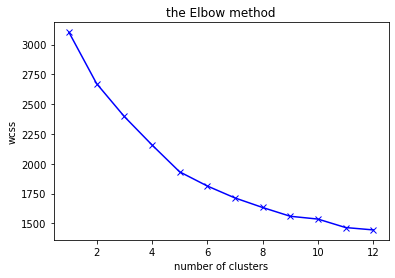

In [44]:
plt.plot(range(1,13),wcss,'bx-') #tracer le méthode elbow
plt.title('the Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
wcss=list()
Knmeans=KMeans(n_clusters=7,init='k-means++') #Initial Choice of centroids
Knmeans.fit(x_scaler)
wcss.append( Knmeans.inertia_)
wcss

[1716.9215015596292]

In [46]:
y_Kmeans=Knmeans.labels_
y_Kmeans
L0=list()
L1=list()
L2=list()
L3=list()
L4=list()
L5=list()
L6=list()

for i in range(len(y_Kmeans)):
    if y_Kmeans[i]==0 :
        L0.append(i)
    if y_Kmeans[i]==1 :
        L1.append(i)
    if y_Kmeans[i]==2 :
        L2.append(i)
    if y_Kmeans[i]==3 :
        L3.append(i)
    if y_Kmeans[i]==4 :
        L4.append(i)
    if y_Kmeans[i]==5 :
        L5.append(i)
    if y_Kmeans[i]==6 :
        L6.append(i)
print("Cluster 0: ",L0)
print("Cluster 1: ",L1)
print("Cluster 2: ",L2)
print("Cluster 3: ",L3)
print("Cluster 4: ",L4)
print("Cluster 5: ",L5)
print("Cluster 6: ",L6)

Cluster 0:  [6, 11, 14, 26, 37, 58, 71, 99, 112, 119, 121, 123, 136, 138, 140, 145]
Cluster 1:  [12, 47, 51, 102, 126, 127, 129, 146, 148, 157, 159, 163, 165, 166, 167, 170, 174, 177, 178, 180, 183, 186, 188, 190, 192, 193]
Cluster 2:  [50, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98]
Cluster 3:  [151, 152, 156, 158, 160, 162, 164, 168, 171, 175, 176, 181, 184, 187, 191]
Cluster 4:  [101, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114, 115, 116, 117, 118, 120, 122, 124, 125, 128, 130, 131, 132, 133, 134, 135, 137, 139, 141, 142, 143, 144]
Cluster 5:  [52, 65, 80, 81, 82, 90, 100, 111, 147, 149, 150, 153, 154, 155, 161, 169, 172, 173, 179, 182, 185, 189]
Cluster 6:  [0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49]


In [47]:
for i in range(len(DF_new)):
    if i in L0 :
        DF_new.at[i, "Cluster label"]=0
    if i in L1 :
        DF_new.at[i, "Cluster label"]=1
    if i in L2 :
        DF_new.at[i, "Cluster label"]=2
    if i in L3 :
        DF_new.at[i, "Cluster label"]=3
    if i in L4 :
        DF_new.at[i, "Cluster label"]=4
    if i in L5 :
        DF_new.at[i, "Cluster label"]=5
    if i in L6 :
        DF_new.at[i, "Cluster label"]=6

In [48]:
DF_new

,Song_name,Cluster label,artist popularity,popularity,valence,danceability,modes,India,Mexico,Sweden,USA,mel,rms(mean),rms(var),sc(mean),sc(var),zcr(mean),zcr(var),duration,bpm
0,Pasoori,6,66,85,0.669,0.714,0,1,0,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.103208,0.006812,1602.489614,2664804.769877,0.024009,0.002542,30.0,117.453835
1,NO LOVE,6,68,82,0.733,0.771,0,1,0,0,0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.121765,0.004429,1453.309475,1049037.944348,0.034312,0.000697,30.0,135.999178
2,295,6,80,82,0.432,0.557,0,1,0,0,0,"[[0.0, 3.3929434e-10, 1.3724954e-07, 1.6854187...",0.069945,0.002014,2459.359031,2118254.726979,0.053693,0.001403,30.0,117.453835
3,Excuses,6,74,82,0.494,0.837,0,1,0,0,0,"[[0.0, 0.0, 5.0189664e-10, 0.00040219448, 0.00...",0.181299,0.014955,2588.402877,1263533.164106,0.076413,0.002185,30.0,95.703125
4,Left and Right (Feat. Jung Kook of BTS),6,83,94,0.719,0.881,1,1,0,0,0,"[[0.0, 4.045242e-10, 7.6411645e-08, 1.6847837e...",0.21467,0.015608,2074.442767,1843465.613287,0.03884,0.001309,30.0,101.332721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,STAY (with Justin Bieber),5,83,88,0.478,0.591,1,0,0,0,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.047984,0.001474,688.897687,144853.016876,0.020405,0.000096,30.0,112.347147
190,Cooped Up (with Roddy Ricch),1,89,82,0.377,0.669,1,0,0,0,1,"[[0.0, 1.7022178e-19, 0.015396073, 0.04632222,...",0.230216,0.032484,2157.610271,2036781.566733,0.049531,0.002176,30.0,126.048018
191,Something in the Orange,3,78,83,0.148,0.369,0,0,0,0,1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.115682,0.011302,2016.719663,2338058.723625,0.035375,0.001322,30.0,109.956782
192,No Role Modelz,1,84,88,0.494,0.69,0,0,0,0,1,"[[2.612545e-06, 3.6571803e-06, 5.299702e-06, 4...",0.151612,0.02118,1613.980606,1291097.390851,0.046861,0.001266,30.0,99.384014


In [52]:
print(os.getcwd())
# DF_new.to_csv('MIR_summary.csv', index=False)
DF_new.to_pickle('MIR_summary.pkl', compression='bz2', protocol=4)

C:\Users\andre\Documents\Github\The-sound-of-Ai-Hack-V1.0


In [54]:
DF_new['mel'].iloc[0].shape

(128, 1292)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
x_pca=pca.fit(x_scaler)
print(x_pca.explained_variance_ratio_)

In [ ]:
L=x_pca.explained_variance_ratio_

In [ ]:
L.sort()
L=L[::-1] #revserse order to make it descending
j=L[0]+L[1] /sum(L)
j # the biggest 2 PCA components dsecribe 40% of the information  , showcasing results in a plane is mildly acceptable

In [ ]:
#NMF example

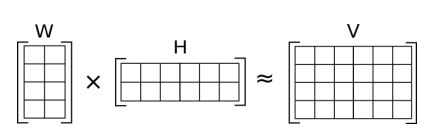

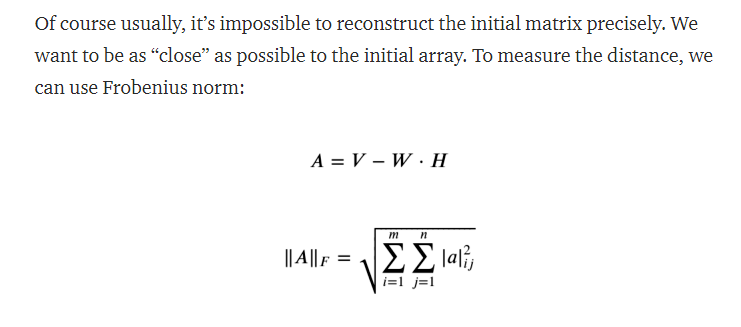

(SVD is the theoritical counter-part to NMF that provides exact W and H)

In [ ]:
import numpy as np
X = np.array([[1, 1], [2, 1], [3, 1.2], [4, 1], [5, 0.8], [6, 1]])
from sklearn.decomposition import NMF
model = NMF(n_components=2, init='random', random_state=0,tol=5e-3)
W = model.fit_transform(X)
W

In [ ]:
H = model.components_
H

In [ ]:
X_new = np.array([[1, 0], [1, 6.1], [1, 0], [1, 4], [3.2, 1], [0, 4]])
W_new = model.transform(X_new)
W_new

In [ ]:
# updated the schematics on draw.io 
# how to fill recommendation 
# for missing values https://github.com/scikit-learn/scikit-learn/pull/8474 found in https://stackoverflow.com/questions/39367597/how-to-deal-with-missing-values-in-python-scikit-nmf
# Have Run-Debug tests
# add Dags
    #https://www.youtube.com/watch?v=s-r2gEr7YW4&t=517s
# add a UI
        #in jupyter notebook with widgets https://www.youtube.com/watch?v=eyEabQRBMQA
        #using StreamLit
        #using a game development library with ready UI components https://www.pygame.org/docs/search.html?q=rotation+an+image
                 # got from here https://analyticsindiamag.com/top-9-python-frameworks-for-game-development/